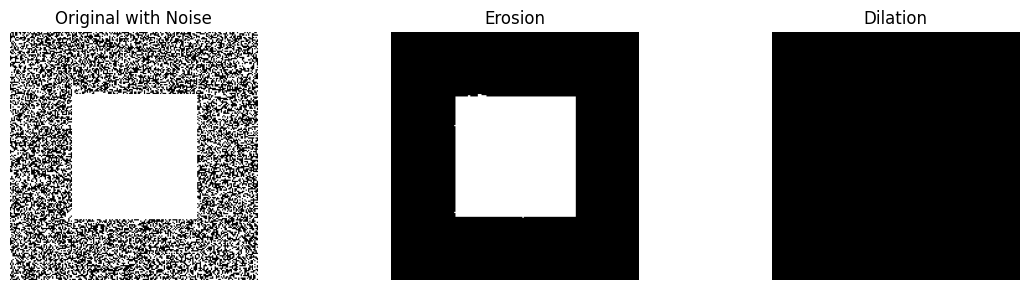

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# PART 1: Morphological Transformations
# -----------------------------
# Create a black image with white rectangle
morph_img = np.zeros((200, 200), dtype=np.uint8)
morph_img = cv2.rectangle(morph_img, (50, 50), (150, 150), 255, -1)

# Add noise
noise = np.random.randint(0, 2, (200, 200)) * 255
noisy_img = cv2.bitwise_or(morph_img, noise.astype(np.uint8))

# Erosion and Dilation
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(noisy_img, kernel, iterations=1)
dilation = cv2.dilate(noisy_img, kernel, iterations=1)

# Display results
plt.figure(figsize=(12, 3))
titles = ['Original with Noise', 'Erosion', 'Dilation']
images = [noisy_img, erosion, dilation]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

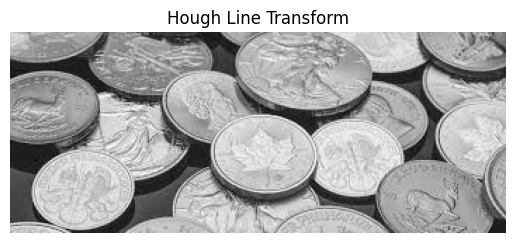

In [2]:
# -----------------------------
# PART 2: Hough Line Transform
# -----------------------------
# Load your grayscale coin image
img_gray = cv2.imread('/kaggle/input/coinsimage/download (5).jfif', 0)
img_color = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

# Edge detection
edges = cv2.Canny(img_gray, 50, 150)

# Detect lines using Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_color, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Show Hough lines
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Hough Line Transform")
plt.axis('off')
plt.show()

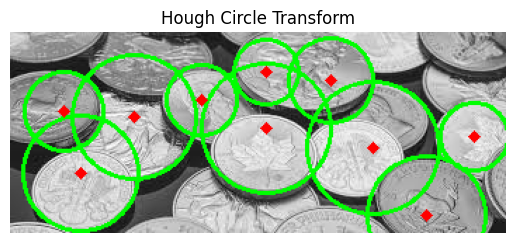

In [3]:

# -----------------------------
# PART 3: Hough Circle Transform
# -----------------------------
# Reload image in grayscale for circles
img_circle = cv2.imread('/kaggle/input/coinsimage/download (5).jfif', 0)
img_output = cv2.cvtColor(img_circle, cv2.COLOR_GRAY2BGR)

# Blur and detect circles
blurred = cv2.medianBlur(img_circle, 5)
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=40,
                           param1=100, param2=30, minRadius=10, maxRadius=100)

# Draw circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(img_output, (i[0], i[1]), i[2], (0, 255, 0), 2)  # Outer circle
        cv2.circle(img_output, (i[0], i[1]), 2, (0, 0, 255), 3)     # Center

# Show Hough circles
plt.imshow(cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB))
plt.title("Hough Circle Transform")
plt.axis('off')
plt.show()